# バックテスト検証ノート

In [1]:
import os
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [2]:
current_dir = %pwd
timestamp = os.path.basename(current_dir)

In [3]:
import sys
sys.path.append('/home/tsu-nera/repo/bakuchi/')
%cd '../../'

/home/tsu-nera/repo/bakuchi


In [4]:
from src.utils.backtesting import Backtesting, run_backtesting

%reload_ext autoreload
%autoreload 2

File doesn't exist 


In [5]:
bt = Backtesting(timestamp)

In [6]:
df_ex1 = bt.get_coincheck_df()
df_ex2 = bt.get_liquid_df()

In [7]:
len(df_ex1), len(df_ex2)

(12894, 12894)

## テスト実行

In [8]:
bt.run()

##  取引履歴

In [9]:
arbitrage_histories = bt.get_arbitrage_histories()

headers = ["取引日時", "購入取引所", "売却取引所", "通貨ペア", "取引量", "期待利益"]
arbitrage_histories_df = pd.DataFrame(arbitrage_histories, columns=headers)
arbitrage_histories_df

,取引日時,購入取引所,売却取引所,通貨ペア,取引量,期待利益
0,2020-05-07 00:16:19,coincheck,liquid,BTC/JPY,0.006,6
1,2020-05-07 00:18:28,liquid,coincheck,BTC/JPY,0.006,0
2,2020-05-07 00:28:52,coincheck,liquid,BTC/JPY,0.006,6
3,2020-05-07 00:43:23,liquid,coincheck,BTC/JPY,0.006,0
4,2020-05-07 01:02:11,coincheck,liquid,BTC/JPY,0.006,6
5,2020-05-07 01:04:12,liquid,coincheck,BTC/JPY,0.006,0
6,2020-05-07 01:08:54,coincheck,liquid,BTC/JPY,0.006,6
7,2020-05-07 01:09:18,liquid,coincheck,BTC/JPY,0.006,1
8,2020-05-07 01:09:38,coincheck,liquid,BTC/JPY,0.006,6
9,2020-05-07 01:10:26,liquid,coincheck,BTC/JPY,0.006,0


In [10]:
histories = bt.get_trade_histories()
headers = ["取引日時",  "売買",  "取引所", "レート"]
histories_df = pd.DataFrame(histories, columns=headers)
histories_df

,取引日時,売買,取引所,レート
0,2020-05-07 00:16:19,coincheck,買い,984938
1,2020-05-07 00:16:19,liquid,売り,986100
2,2020-05-07 00:18:28,liquid,買い,984036
3,2020-05-07 00:18:28,coincheck,売り,983901
4,2020-05-07 00:28:52,coincheck,買い,983703
5,2020-05-07 00:28:52,liquid,売り,984847
6,2020-05-07 00:43:23,liquid,買い,983049
7,2020-05-07 00:43:23,coincheck,売り,983000
8,2020-05-07 01:02:11,coincheck,買い,982032
9,2020-05-07 01:02:11,liquid,売り,983130


## 結果まとめ

In [11]:
bt.display()

バックテスト情報
-------------------  -------------------
         レコード数                12894
           取引回数                   16
           開始日時  2020-05-07 00:08:43
           終了日時  2020-05-07 01:25:00
        取引時間[H]      0 days 01:16:17
      取引単位[BTC]                0.006
  利確しきい値[JPY]                 1000
損切りマージン[JPY]                 1000
-------------------  -------------------

バックテスト結果
-----------  -------
開始[JPY]      10000
終了[JPY]      10052
利益[JPY]         52
開始[BTC]      0.022
終了[BTC]      0.022
利益[BTC]          0
開始[TOTAL]    31589
終了[TOTAL]  31641.5
利益[TOTAL]   52.524
-----------  -------


## グラフ出力

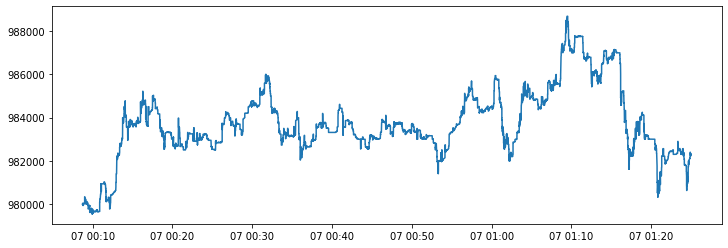

In [12]:
plt.figure(figsize=(12,4))
plt.plot(df_ex1.index, df_ex1['bid'])

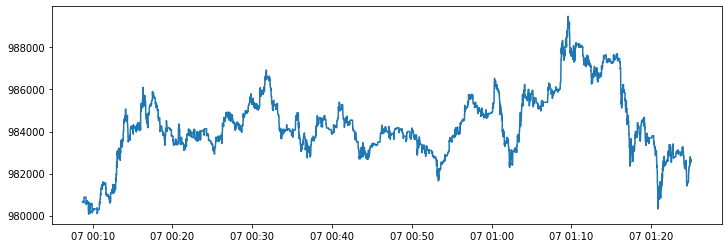

In [13]:
plt.figure(figsize=(12,4))
plt.plot(df_ex2.index, df_ex2['bid'])

## 分析

### 時間別の取引回数と利益

### 時間別の価格差の推移

In [14]:
profit_margin_df = pd.DataFrame({
    "timestamp": pd.to_datetime(df_ex1.index),
    "buy_coincheck_sell_liquid": df_ex2.reset_index().bid - df_ex1.reset_index().ask,
    "buy_liquid_sell_coincheck": df_ex1.reset_index().bid - df_ex2.reset_index().ask,
    'coincheck_bid': df_ex1.reset_index().bid,
     'liquid_ask': df_ex2.reset_index().ask,
    'liquid_bid': df_ex2.reset_index().bid,
    'coincheck_ask': df_ex1.reset_index().ask,
})

profit_margin_df = profit_margin_df.set_index("timestamp")

In [15]:
pd.options.display.float_format = '{:.0f}'.format
profit_margin_df.resample(rule='10Min').mean()

,buy_coincheck_sell_liquid,buy_liquid_sell_coincheck,coincheck_bid,liquid_ask,liquid_bid,coincheck_ask
timestamp,,,,,,
2020-05-07 00:00:00,236,-767,979923,980690,980588,980352
2020-05-07 00:10:00,312,-790,982718,983507,983343,983030
2020-05-07 00:20:00,468,-868,983300,984168,984046,983579
2020-05-07 00:30:00,500,-923,983755,984678,984545,984045
2020-05-07 00:40:00,195,-597,983419,984016,983892,983697
2020-05-07 00:50:00,-49,-422,983629,984052,983916,983964
2020-05-07 01:00:00,135,-670,984925,985595,985440,985305
2020-05-07 01:10:00,281,-816,985468,986285,986100,985819
2020-05-07 01:20:00,42,-619,982141,982760,982599,982557
